# South Africa Automotive Industry Exploratory Data Analysis 

# 1.0 Introduction
## 1.1 Backgound

This project revolves around the Car Prices Dataset from South Africa. The dataset contains valuable information about various car prices in the South African market. It includes details such as the brand, model, model description, and price of the cars. This dataset covers a wide range of popular car models sold in South Africa, providing insights into pricing trends across different brands and models.

Data Source: https://www.kaggle.com/datasets/tamsanqalowan/car-prices-in-south-africa

# 1.2 Problem Statement

The goal of this project is to analyze this dataset to understand the pricing trends of different car brands and models in South Africa. This analysis could be beneficial for potential car buyers, sellers, or anyone interested in the South African car market. The dataset can also serve as a useful resource for practicing data analysis and machine learning techniques.



# 2.0 Data Access
### 2.1 Extracting the Data

To start with the project, we first need to unzip the archive file containing the dataset. Here is a Python code snippet that can be used to unzip the file:


In [86]:
# import zipfile module 
import zipfile


# define the zip file extraction function
def unzip_file(zip_path, dest_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(dest_path)

unzip_file('archive.zip', '.')




In the code below, the pandas module is imported first. A function named `read_csv_file` is then defined, which takes a file path as an argument and returns a DataFrame created from the CSV file at that path. This function is then used to read the 'car_prices_rsa_update_011.csv' file and store the resulting DataFrame in the variable `df`.

In [87]:
# Import pandas module
import pandas as pd

# Define the function to read the CSV file
def read_csv_file(file_name):
    return pd.read_csv(file_name)

# Use the function to read the 'car_prices_rsa_update_011.csv' file
car_prices_rsa_df = read_csv_file('car_prices_rsa_update_011.csv')

# Display the first few rows of the DataFrame
car_prices_rsa_df.head()

,Brand,Model,Model_Description,Price,Engine_Size
0,Suzuki,S-Presso,1.0 GL,162900.0,1.0
1,Suzuki,S-Presso,1.0 GL+,169900.0,1.0
2,Suzuki,Celerio,1.0 GA,178900.0,1.0
3,Renault,Kwid,1.0 Life,180999.0,1.0
4,Suzuki,S-Presso,1.0 S-Edition,185900.0,1.0


In [88]:
# Display the information of the DataFrame
car_prices_rsa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574 entries, 0 to 2573
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              2574 non-null   object 
 1   Model              2574 non-null   object 
 2   Model_Description  2493 non-null   object 
 3   Price              2574 non-null   float64
 4   Engine_Size        1322 non-null   float64
dtypes: float64(2), object(3)
memory usage: 100.7+ KB


## 3.0 Data Cleaning 

### 3.1 Drop Missing Values

The `dropna()` function is used to remove rows with missing values from the 'car_prices_rsa_df' DataFrame. The result is assigned back to 'car_prices_rsa_df', effectively updating the DataFrame. The updated DataFrame is then displayed.

In [89]:
# Remove rows with missing values
car_prices_rsa_df = car_prices_rsa_df.dropna()

# Display the updated DataFrame
car_prices_rsa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1322 entries, 0 to 2573
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1322 non-null   object 
 1   Model              1322 non-null   object 
 2   Model_Description  1322 non-null   object 
 3   Price              1322 non-null   float64
 4   Engine_Size        1322 non-null   float64
dtypes: float64(2), object(3)
memory usage: 62.0+ KB


### 3.2 Remove Outliers

In [90]:
# Display the summary statistics of the DataFrame
car_prices_rsa_df.describe()


,Price,Engine_Size
count,1.322000e+03,1322.000000
mean,5.539196e+05,1.917171
std,2.841672e+05,0.731057
min,1.629000e+05,1.000000
25%,3.569000e+05,1.500000
50%,4.952000e+05,1.900000
75%,6.863000e+05,2.200000
max,1.974900e+06,5.600000


Outliers can be removed using the Interquartile Range (IQR) method. The IQR is the range between the first quartile (25 percentile) and the third quartile (75 percentile). Any data point that falls below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR is considered an outlier.



In [91]:
# Calculate IQR for 'Price'
Q1_price = car_prices_rsa_df['Price'].quantile(0.25)
Q3_price = car_prices_rsa_df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Calculate IQR for 'Engine_Size'
Q1_engine = car_prices_rsa_df['Engine_Size'].quantile(0.25)
Q3_engine = car_prices_rsa_df['Engine_Size'].quantile(0.75)
IQR_engine = Q3_engine - Q1_engine

# Remove outliers
car_prices_rsa_df = car_prices_rsa_df[~((car_prices_rsa_df['Price'] < (Q1_price - 1.5 * IQR_price)) | 
                                        (car_prices_rsa_df['Price'] > (Q3_price + 1.5 * IQR_price)) |
                                        (car_prices_rsa_df['Engine_Size'] < (Q1_engine - 1.5 * IQR_engine)) | 
                                        (car_prices_rsa_df['Engine_Size'] > (Q3_engine + 1.5 * IQR_engine)))]

# Display the updated DataFrame
car_prices_rsa_df

,Brand,Model,Model_Description,Price,Engine_Size
0,Suzuki,S-Presso,1.0 GL,162900.0,1.0
1,Suzuki,S-Presso,1.0 GL+,169900.0,1.0
2,Suzuki,Celerio,1.0 GA,178900.0,1.0
3,Renault,Kwid,1.0 Life,180999.0,1.0
4,Suzuki,S-Presso,1.0 S-Edition,185900.0,1.0
...,...,...,...,...,...
2568,Toyota,Hilux,2.8GD-6 Double Cab 4x4 Legend RS auto,945400.0,2.8
2569,Ford,Ranger,3.0 V6 Double Cab Wildtrak 4WD,953500.0,3.0
2570,Volkswagen,Amarok,3.0 V6 TDI Double Cab Highline 4Motion,1025100.0,3.0
2571,Ford,Ranger,3.0 V6 EcoBoost Double Cab Raptor 4WD,1094900.0,3.0


# 4.0 Exploratoty Data Analysis

## 4.1 The Prevalence of Brand Models

The `value_counts()` function is used on the 'Brand' column of the 'car_prices_rsa_df' DataFrame. This function returns a Series containing counts of unique values in descending order, so that the first element is the most frequently-occurring element. The result is stored in the 'brand_counts' variable and then displayed.

In [92]:
# Get the unique brands and their counts
brand_counts = car_prices_rsa_df['Brand'].value_counts()

# Display the unique brands and their counts
brand_counts.info()

<class 'pandas.core.series.Series'>
Index: 27 entries, Toyota to Jeep
Series name: count
Non-Null Count  Dtype
--------------  -----
27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


The matplotlib module is imported first. Then, a bar chart is created using the `plot()` function with 'bar' as the argument to specify the type of plot. The size of the figure is set to 10x6 for better visibility. The title of the chart is set to 'Car Brands Count', and the x and y labels are set to 'Brand' and 'Count', respectively. Finally, the `show()` function is called to display the plot.

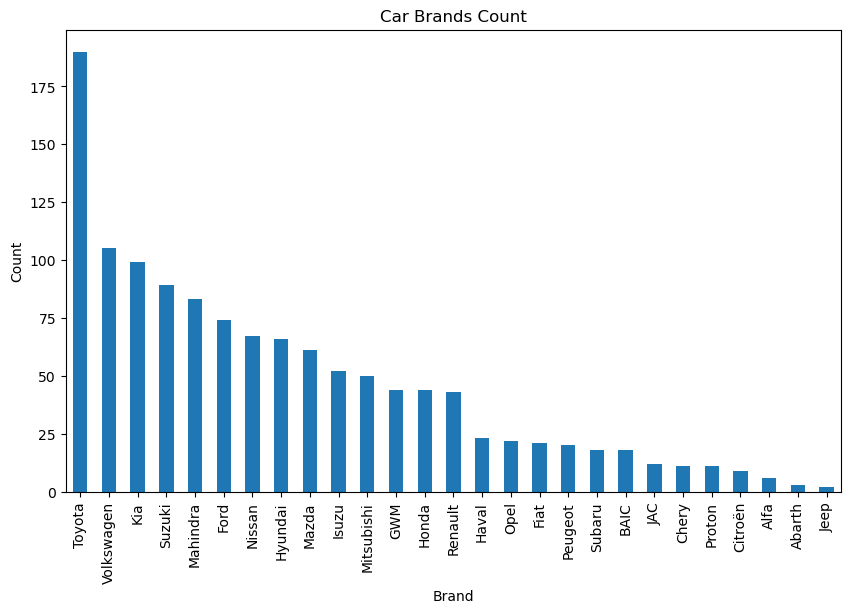

In [93]:
# Import matplotlib module
import matplotlib.pyplot as plt

# Create a bar chart for brand_counts
plt.figure(figsize=(10,6))
brand_counts.plot(kind='bar')
plt.title('Car Brands Count')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

#### Observation: The bar graph indicates that Toyota is the most prevalent car brand within the dataset, with a count close to 175. This is followed by brands like Volkswagen and Kia, which have significantly lower counts. The frequency of each brand decreases progressively, with brands such as Jeep, Alfa Romeo, and Abarth being among the least common. Toyota’s dominance in the market is quite significant compared to other brands, which may reflect its popularity, reliability, or availability. It also suggests that there is a wide variety of car brands available, but only a few dominate in terms of the number of models available. 



## 4.2. Correlation between Price and Engine Size

A heatmap is used to visualize the correlation between different variables. Here, a heatmap will be created to show the correlation between 'Price', and 'Engine Size'.



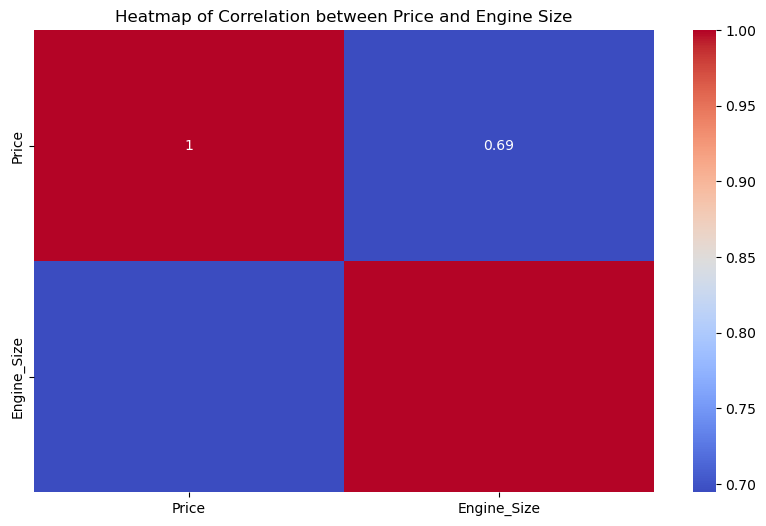

In [94]:
# Calculate the correlation matrix
corr_matrix = car_prices_rsa_df[['Price', 'Engine_Size']].corr()

# Create a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation between Price and Engine Size')
plt.show()

To create a scatter plot with 'Engine_Size' as the X-axis and 'Price' as the Y-axis, the seaborn module's `scatterplot()` function is used to create the plot. The size of the figure is set to 10x6 for better visibility, and the title of the plot and the labels of the X and Y axes are set appropriately. Finally, the `show()` function is called to display the plot.


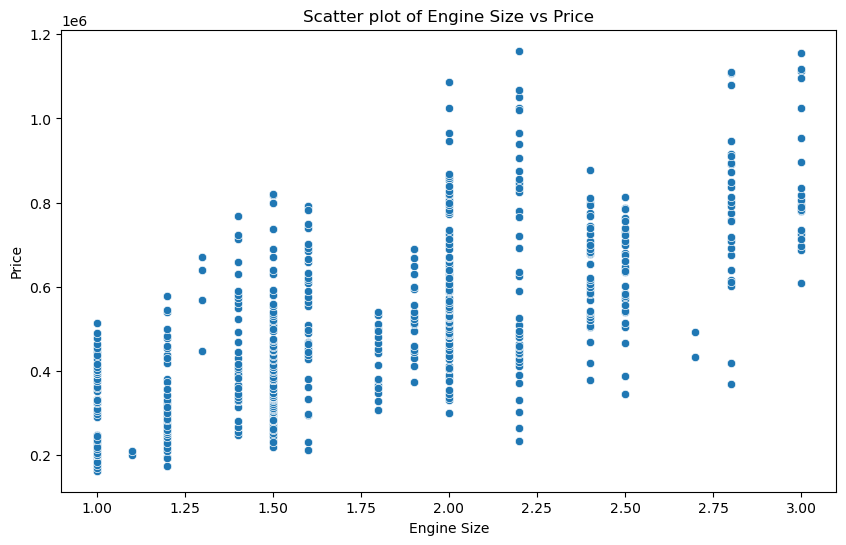

In [95]:
# Import seaborn module
import seaborn as sns

# Create a scatter plot for 'Engine_Size' vs 'Price'
plt.figure(figsize=(10,6))
sns.scatterplot(x='Engine_Size', y='Price', data=car_prices_rsa_df)
plt.title('Scatter plot of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

#### Observation: There is a moderate to strong positive correlation between engine size and price in the dataset. This means that, generally, as the engine size of a vehicle increases, its price tends to increase as well. This trend is consistent across both visualizations, suggesting that engine size is a significant factor in the pricing of vehicles within this particular dataset. However, it’s important to remember that correlation does not imply causation, and other factors may also influence the final price of a vehicle.


## 4.3 Number of Models vs Price Range

To visualize the number of models within each price range, the histogram allow us to see the distribution of the number of models across different price ranges.



c:\Users\tonyg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


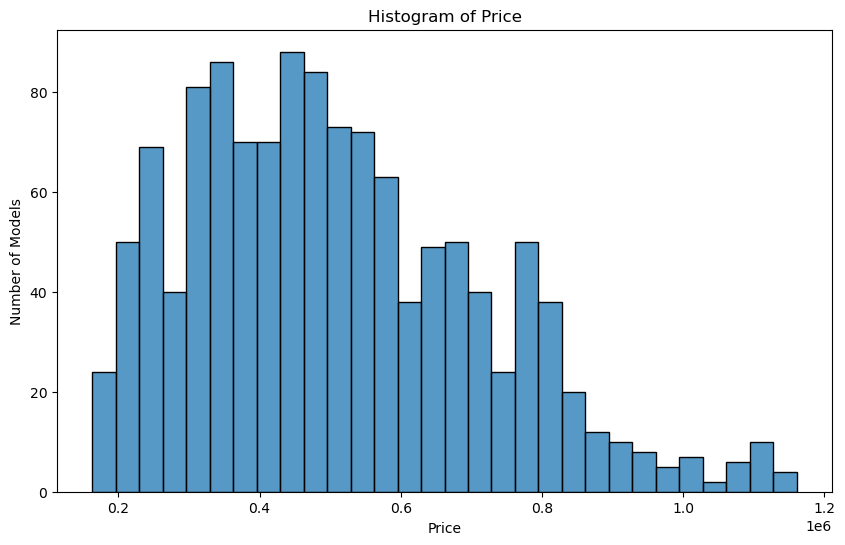

In [96]:
# Create a histogram for 'Price'
plt.figure(figsize=(10,6))
sns.histplot(data=car_prices_rsa_df, x='Price', bins=30)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Number of Models')
plt.show()

#### Observation: The histogram indicates that the most common price range for the models in this dataset is between 200,000 to 600,000. The highest frequency of models falls within this price bracket, suggesting that it represents the typical market pricing for these vehicles. There’s a noticeable decline in the number of models as the price increases beyond 600,000, indicating that higher-priced models are less common. This could imply that the majority of consumers opt for vehicles within this mid-range price segment, possibly due to a balance of features, performance, and affordability.

# 5.0 Recommendations

Based on the observations, here are three recommendations:

## 5.1 To Automotive Manufacturers:

Expand Mid-Range Offerings - Given the histogram’s indication that the most common price range for models is between 200,000 to 600,000, manufacturers should consider expanding their offerings in this segment. This could involve introducing new models or updating existing ones with features that align with consumer expectations for this price range.

## 5.2 To Marketing Teams of Lesser-Known Car Brands: 

Increase Brand Visibility: The bar graph shows a market dominance by Toyota, followed by Volkswagen and Kia. Brands like Jeep, Alfa Romeo, and Abarth, which are less common, should invest in marketing strategies to increase brand visibility and awareness. This could involve targeted advertising campaigns, partnerships, and promotional events to showcase their unique selling points.

## 5.3 To Car Dealerships: 

Stock More Vehicles with Popular Engine Sizes: Considering the positive correlation between engine size and price, dealerships might benefit from stocking a variety of models with engine sizes that are popular among consumers. This would cater to the demand for vehicles that fall within the moderate to strong positive correlation range, potentially increasing sales.

# 6.0 Conclusion

The comprehensive analysis of the Car Prices Dataset from South Africa has provided valuable insights into the automotive market dynamics within the region. The study revealed a moderate to strong positive correlation between engine size and vehicle price, indicating that larger engines typically command higher prices. This trend was consistent across various data visualizations, underscoring engine size as a significant factor in vehicle pricing strategies.

Moreover, the investigation highlighted Toyota's market dominance, with a substantial lead over other brands in terms of model availability. This suggests Toyota's strong brand presence and possibly reflects consumer preferences for reliability and availability. However, the data also showed a diverse range of car brands, suggesting a competitive market with numerous choices for consumers.

The most common price range for vehicles, as indicated by the histogram, falls between 200,000 to 600,000. This price bracket likely represents the sweet spot for the majority of consumers, balancing features, performance, and affordability. The decline in model frequency beyond this range suggests that higher-priced models are less common, possibly due to a smaller target market.

The findings from this project can inform various stakeholders, including manufacturers, dealerships, and marketing teams, to tailor their strategies according to consumer behavior and market trends. For potential buyers and sellers, these insights can guide informed decision-making in the car purchasing process. Additionally, the dataset serves as a rich resource for further research and application of data analysis and machine learning techniques, potentially leading to more nuanced understandings of the automotive sector in South Africa.